## LSTM

### Chuẩn bị dữ liệu

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')

# Chỉ sử dụng cột giá đóng cửa
data = df['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu (Scale data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Tạo tập dữ liệu với các bước thời gian
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Định dạng lại dữ liệu đầu vào cho LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


### Xây dựng mô hình LSTM

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(time_step, 1)))  # Lớp LSTM đầu tiên với 32 đơn vị
model.add(LSTM(32, return_sequences=False))  # Lớp LSTM thứ hai với 32 đơn vị
model.add(Dense(16))  # Lớp Dense với 16 đơn vị
model.add(Dense(1))  # Lớp đầu ra

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Sử dụng EarlyStopping để dừng sớm nếu mô hình không cải thiện
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Huấn luyện mô hình
model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=[early_stop], verbose=1)


Epoch 1/50


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0533
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.1226e-04
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.2919e-04
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.5561e-04
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.5765e-04
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.7078e-04
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.

### Dự đoán và đánh giá mô hình

In [3]:
# Dự đoán giá cổ phiếu
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Đưa dữ liệu về dạng ban đầu
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Đưa y_train và y_test về dạng ban đầu
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Đánh giá mô hình
import math
from sklearn.metrics import mean_squared_error



test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Root Mean Squared Error (RMSE) LSTM: {test_score}')


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Root Mean Squared Error (RMSE) LSTM: 5.000072948185939


### Vẽ biểu đồ kết quả

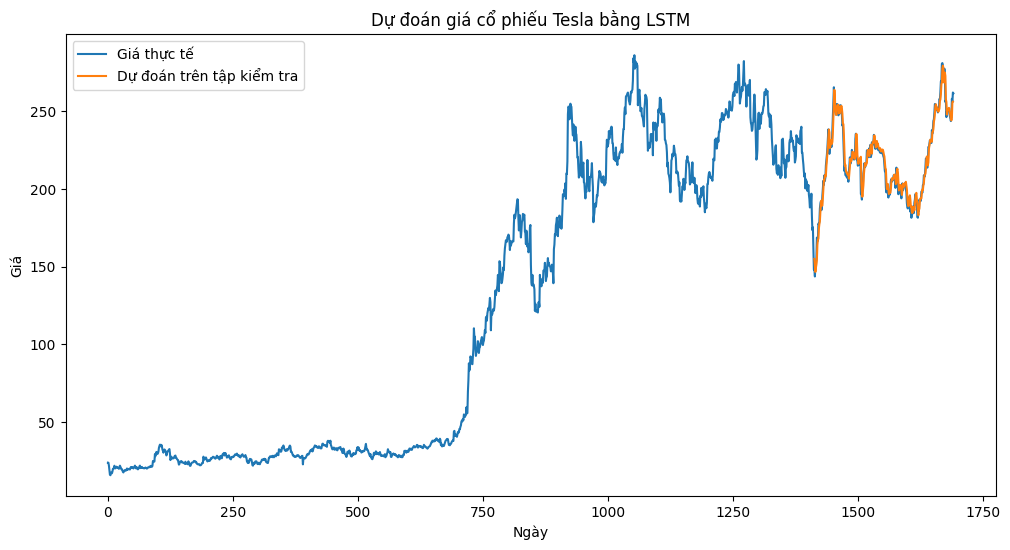

In [4]:


# Dữ liệu dự đoán trên tập kiểm tra
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Giá thực tế')

plt.plot(test_plot, label='Dự đoán trên tập kiểm tra')
plt.title('Dự đoán giá cổ phiếu Tesla bằng LSTM')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.show()


## GRU

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Tải dữ liệu
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')

# Chỉ sử dụng cột giá đóng cửa
data = df['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Tạo tập dữ liệu với các bước thời gian
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Định dạng lại dữ liệu đầu vào cho GRU [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [6]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Xây dựng mô hình GRU
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(1))
model.add(Dense(1))

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0580
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.5722e-04
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3166e-04
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9659e-04
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1740e-04
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9153e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5965e-04
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.2704e-04
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2495e-04
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1146e-04
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3200e-04
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6777e-04
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4791e-04
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5238e-04
Epoch 15/50
41/41 ━━━━━━━━━━━━

In [7]:
# Dự đoán giá cổ phiếu
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Đưa dữ liệu về dạng ban đầu
test_predict = scaler.inverse_transform(test_predict)

# Đưa y_train và y_test về dạng ban đầu
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Đánh giá mô hình
import math
from sklearn.metrics import mean_squared_error



test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Root Mean Squared Error (RMSE) GRU: {test_score}')


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Root Mean Squared Error (RMSE) GRU: 6.3442394964098385


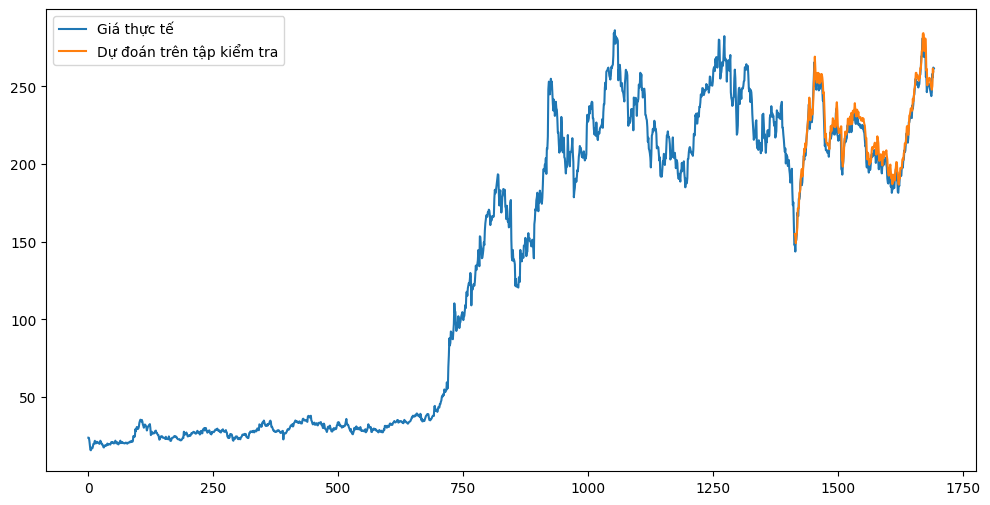

In [8]:
import matplotlib.pyplot as plt



# Dữ liệu dự đoán trên tập kiểm tra
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Giá thực tế')

plt.plot(test_plot, label='Dự đoán trên tập kiểm tra')
plt.legend()
plt.show()


## ARIMA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
sns.set_theme(style='darkgrid',palette='rainbow')
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['figure.figsize'] = (15,10)
from tqdm import tqdm
%matplotlib inline

In [17]:
data = pd.read_csv('Tesla.csv - Tesla.csv.csv',index_col=0,parse_dates=True)
df = data[['Close']].values

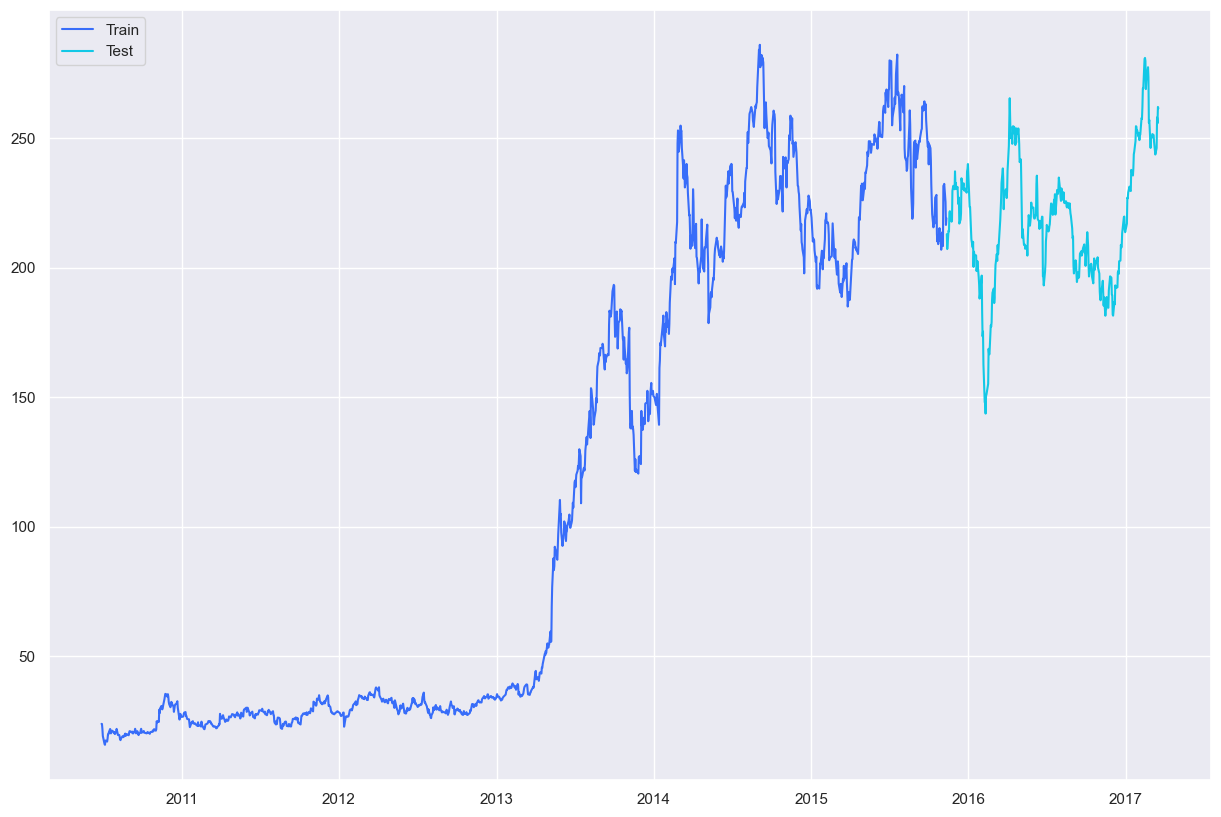

In [18]:
plt.plot(data[:int(len(df) * 0.8)+1]['Close'],label='Train')
plt.plot(data[int(len(df) * 0.8)+1:]['Close'],label='Test')
plt.legend()
plt.show()

In [19]:
# split in test train
row = int(len(df) * 0.8)+1
train = list(df[:row])
test = list(df[row:])
# Train and Predict
n_forcast = len(test) # num forecasts to make
model_pred = [] # to hold predictions
for i in tqdm(range(n_forcast)):
    model = ARIMA(train,order=(4,1,0)) # train model with p = 4 , d = 1 , q = 0
    model_fit = model.fit() # fit the model on data
    out = model_fit.forecast() # forecast
    model_pred.append(out)
    actual = test[i]
    train.append(actual) 
import numpy as np

# Tính toán MSE
mse = mean_squared_error(test, model_pred)

# Tính toán RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


100%|██████████| 338/338 [00:46<00:00,  7.21it/s]

Root Mean Squared Error (RMSE): 5.013026486414748


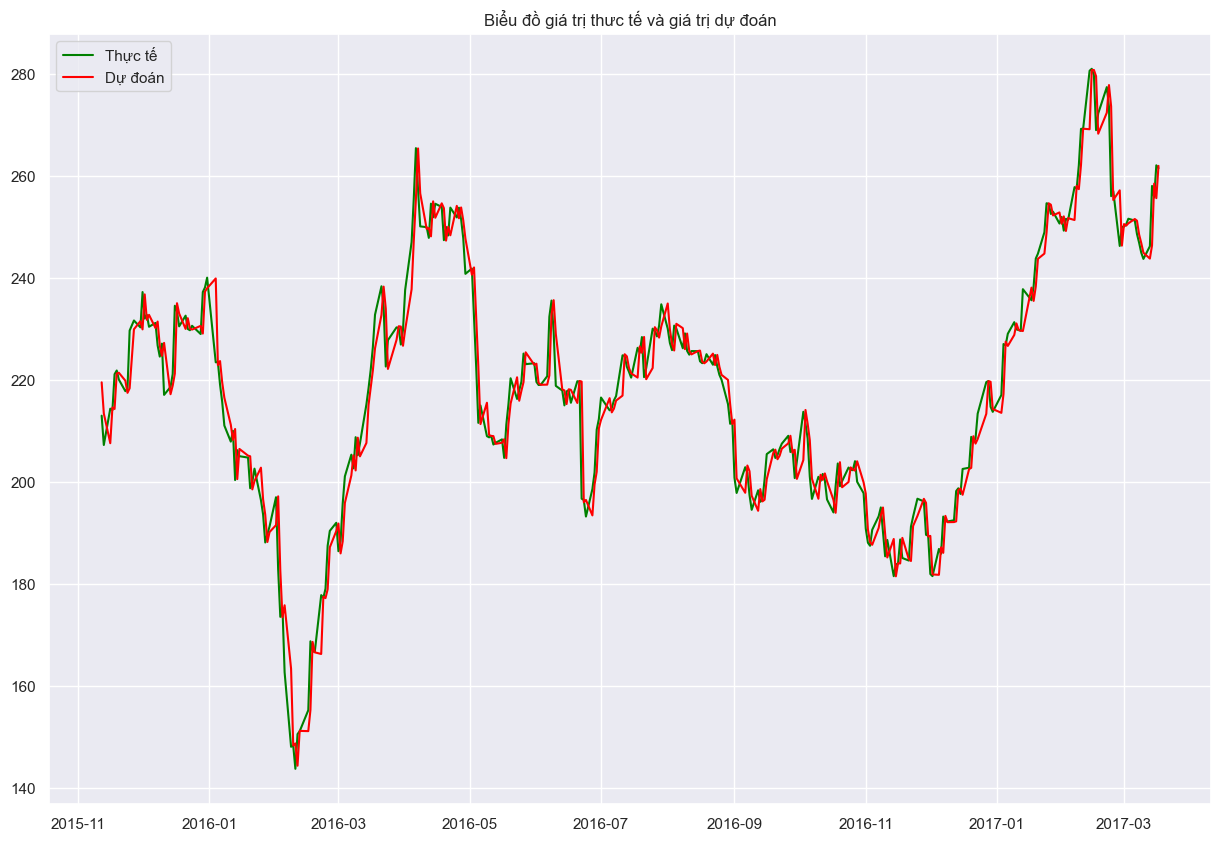

In [20]:
index_date = data[row:].index
plt.plot(index_date,test,color='green',label='Thực tế')
plt.plot(index_date,model_pred,color='red',label='Dự đoán')
plt.title('Biểu đồ giá trị thưc tế và giá trị dự đoán')
plt.legend()
plt.show()

## CNN-LSTM

Epoch 1/5


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1114 - val_loss: 0.0023
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - val_loss: 0.0016
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - val_loss: 0.0015
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Root Mean Squared Error (RMSE): 10.529148214319733


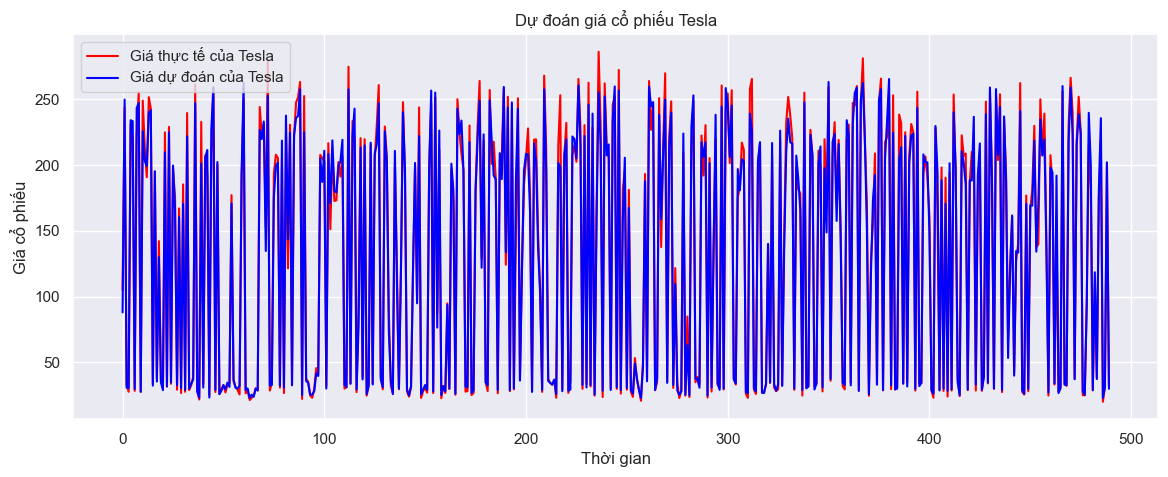

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')

# Sử dụng cột 'Close' làm dữ liệu đầu vào
close_prices = data['Close'].values

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices.reshape(-1, 1))

# Tạo dữ liệu đầu vào cho mô hình
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_prices)):
    X.append(scaled_prices[i-sequence_length:i, 0])
    y.append(scaled_prices[i, 0])

X = np.array(X)
y = np.array(y)

# Chuyển đổi dữ liệu thành định dạng phù hợp cho CNN-LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Chia dữ liệu thành tập huấn luyện (70%) và kiểm tra (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Xây dựng mô hình CNN-LSTM
model = Sequential()

# Lớp CNN để trích xuất đặc trưng không gian
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Lớp LSTM để xử lý tuần tự
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Lớp đầu ra
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Dự đoán trên tập kiểm tra
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Chuyển đổi y_test về giá gốc
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(14, 5))
plt.plot(real_prices, color='red', label='Giá thực tế của Tesla')
plt.plot(predicted_prices, color='blue', label='Giá dự đoán của Tesla')
plt.title('Dự đoán giá cổ phiếu Tesla')
plt.xlabel('Thời gian')
plt.ylabel('Giá cổ phiếu')
plt.legend()
plt.show()


## CNN-RNN

Epoch 1/100


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0849
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9249e-04
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3894e-04
Epoch 1

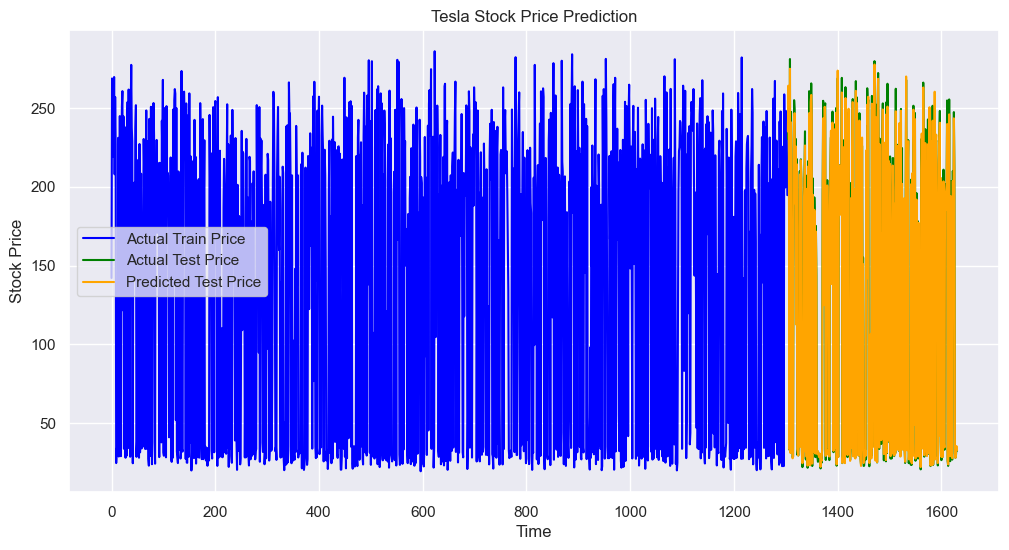

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')

# Lấy giá cổ phiếu đóng cửa
closing_prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Tạo dữ liệu đầu vào và đầu ra cho mô hình
X = []
y = []
look_back = 60
for i in range(len(closing_prices_scaled) - look_back - 1):
    X.append(closing_prices_scaled[i:(i + look_back), 0])
    y.append(closing_prices_scaled[i + look_back, 0])
X, y = np.array(X), np.array(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape dữ liệu cho phù hợp với đầu vào của mạng CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình hybrid model network sử dụng SimpleRNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(SimpleRNN(50, return_sequences=True))
model.add(SimpleRNN(50))
model.add(Dense(1))

# Compile và huấn luyện mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Dự đoán giá trị trên cả tập huấn luyện và tập kiểm tra
predicted_train_prices = model.predict(X_train)
predicted_test_prices = model.predict(X_test)

# Khôi phục dữ liệu về đơn vị gốc
predicted_train_prices = scaler.inverse_transform(predicted_train_prices)
predicted_test_prices = scaler.inverse_transform(predicted_test_prices)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Tính toán RMSE cho tập huấn luyện và tập kiểm tra
train_rmse = np.sqrt(mean_squared_error(y_train, predicted_train_prices))
test_rmse = np.sqrt(mean_squared_error(y_test, predicted_test_prices))

print(f'Test RMSE: {test_rmse}')

# Tạo mảng dữ liệu cho tập huấn luyện và tập kiểm tra
train_range = np.arange(0, len(y_train))
test_range = np.arange(len(y_train), len(y_train) + len(y_test))

# Vẽ biểu đồ so sánh giá thực tế và dự đoán trên cả tập huấn luyện và tập kiểm tra
plt.figure(figsize=(12, 6))
plt.plot(train_range, y_train, color='blue', label='Actual Train Price')
plt.plot(test_range, y_test, color='green', label='Actual Test Price')
plt.plot(test_range, predicted_test_prices, color='orange', label='Predicted Test Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
